# Chapter 4-Dynamic Programming

The term dynamic programming(DP) refers to a collection of algorithms that can be used to compute optimal policies given a perfect model of the environment as a Markov decision process.重点是给定环境模型，下一章的蒙特卡洛方法不需要给定环境模型。DP在实际应用中比较受限，但是在理论上非常重要，是理解其他方法的基石。<br>

动态规划或者强化学习的key idea是使用价值函数来组织和机构化好策略的搜索。

## 4.1 Policy Evaluation
**Policy evalueation：**对任意给定策略$\pi$计算state-value function。我们通常也称之为**prediction problem**<br>
### iterative policy evaluation
$$
\begin{align}
v_{k+1}(s) &= \mathbb{E}\big[R_{t+1}+\gamma v_k(S_{k+1})\ \big|\ S_t=s\big]\\
        &= \sum\limits_{a}\pi(a\mid s)\sum\limits_{s',r}p(s',r\mid s,a)\big[r+\gamma v_k(s')\big]\quad\forall s\in \mathcal{S}
\end{align}
$$
- 其中，Bellman equation保证了$v_k=v_\pi$，确实在确保$v_\pi$存在的情况下，当$k\rightarrow\infty$时，序列$\{v_k\}$将收敛到$v_\pi$<br>
- **full backup：**每次迭代更新所有的状态价值
- **in place：**每个新更新的状态价值立刻覆盖老的值，in place算法同样收敛于$v_\pi$，而且往往更快。
- **算法的终止：**
每次扫描更新后，检验$\max\limits_{s\in\mathcal{S}}|v_{k+1}(s)-v_k(s)|$，当其小于设定的阈值时，终止。

> Input $\pi$, the policy to be evaluated<br>
初始化数组 $V(s)=0,\forall s\in\mathcal{S}^+$ <br>
Repeat<br>
$\quad\Delta \leftarrow 0$<br>
$\quad\quad$For each $s\in\mathcal{S}$:<br>
$\quad\quad\quad$ $v\leftarrow V(s)$<br>
$\quad\quad\quad$ $V(s)\leftarrow \sum_a\pi(a\mid s)\sum_{a',r}p(s',r\mid s,a)[r+\gamma V(s')]$<br>
$\quad\quad\quad$ $\Delta\leftarrow max(\Delta,|v-V(s)|)$<br>
until $\Delta < \theta(一个很小的正数)$<br>
Output $V\approx v_\pi$

## 4.2 Policy Improvement
### Policy improvement theorem
设$\pi$和$\pi'$是任意一对deterministic策略($\pi(a|s)$是确定的动作)，且对$\forall s\in\mathcal{S}$有$q_\pi(s,\pi'(s))\ge v_\pi(s)$，则策略$\pi'$必定好于$\pi$，或和$\pi$一样好。也就是说，对$\forall s\in\mathcal{S}$都有$v_{\pi'}\ge v_\pi(s)$。 证明(deterministic policy)参见page85。

### Policy improvement
The process of making a new policy that improves on an original policy, by making it greedy with respect to the value  function of the original policy, is called **policy improvement**——对stochastic policy也适用
$$
\begin{align}
\pi'(s) &= argmax_a q_\pi(s,a) \\
      &= argmax_a \mathbb{E}\big[R_{t+1}+\gamma v_\pi(S_{t+1})\mid S_t=s,A_t=a\big]\\
      &= argmax_a\sum\limits_{s',r}p(s',r\mid s,a)\big[r+\gamma v_\pi(s')\big]
\end{align}
$$

## 4.3 Policy Iteration
$$\pi_0 \overset{E}{\longrightarrow} v_{\pi_0} \overset{I}{\longrightarrow} \pi_1 \overset{E}{\longrightarrow} v_{\pi_1} \overset{I}{\longrightarrow} \pi_2 \overset{E}{\longrightarrow} \cdots \overset{I}{\longrightarrow} \pi_* \overset{E}{\longrightarrow} v_*$$

evaluation和improvement交替进行，最终收敛到最优策略和最优价值函数。这种寻找最优策略的方法叫做policy iteration。

>**Policy iteration (using iterative policy evaluation)**
1. **Initialization**<br>
$V(s)\in \mathbb{R}$ and $\pi(s)\in\mathcal{A}\quad\forall s\in\mathcal{S}$
2. **Policy Evaluation**<br>
Repeat
$\quad\Delta\leftarrow 0$<br>
$\quad$For each $s\in\mathcal{S}$:<br>
$\quad\quad$ $v\leftarrow V(s)$<br>
$\quad\quad$ $V(s)\leftarrow \sum\limits_{s',r}p(s',r\mid s,\pi(s))\big[r+\gamma V(s')\big]$<br>
$\quad\quad$ $\Delta \leftarrow \max(\Delta,|v-V(s)|)$<br>
until $\Delta<\theta (一个小正数)$
3. **Policy Improvement**<br>
*policy-stable* $\leftarrow$ *True*<br>
For each $s\in\mathcal{S}$<br>
$\quad$ $old_action \leftarrow \pi(s)$<br>
$\quad\quad$ $\pi(s) \leftarrow argmax_a\sum\limits{s',r}p(s',r\mid s,a)\big[r+\gamma V(s')\big]$<br>
$\quad\quad$ If $old_action \ne \pi(s)$, then *policy-stable* $\leftarrow$ *False*<br>
If *policy-stable*, then stop and return $V\approx v_*$ and $\pi \approx \pi_*$; else go to 2

上述算法有一个缺陷，那就是当在多个一样好的策略之间切换时，算法将永远不会终止，因此在实际使用中需要添加额外的flag来修复这个bug。

## 4.4 Value Iteration
policy iteration的一个缺点是每个循环内的policy evaluation内部也有一个循环多次扫描整个状态集。事实上，policy evaluation中的循环可以提前终止而仍然保持收敛性。一种重要的特殊情况是，policy evaluation在执行一次全状态扫描后就停止，这种算法称为**value iteration**
$$
\begin{align}
v_{k+1} &= \max\limits_a\mathbb{E}\big[R_{k+1}+\gamma v_k(S_{k+1})\mid S_t=s,A_t=a\big] \\
      &= \max\limits_a\sum_{s',r}p(s',r\mid s,a)\big[r+\gamma v_k(s')\big] \quad\forall s\in\mathcal{S}
\end{align}$$

> **Value iteration**<br>
Repeat
$\quad\Delta\leftarrow 0$<br>
$\quad$For each $s\in\mathcal{S}$:<br>
$\quad\quad$ $v\leftarrow V(s)$<br>
$\quad\quad$ $V(s)\leftarrow \max\limits_a\sum\limits_{s',r}p(s',r\mid s,a)\big[r+\gamma V(s')\big]$<br>
$\quad\quad$ $\Delta \leftarrow \max(\Delta,|v-V(s)|)$<br>
until $\Delta<\theta (一个小正数)$<br>
Output a deterministic policy, $\pi\approx\pi_*$, such that $\pi(s) = argmax_a\sum_{s',r}p(s',r\mid s,a)\big[r+\gamma V(s')\big]$

## 4.5 Asynchronous Dynamic Programming
**Asychronous DP algorithm** are in-place iterative DP algorithms that are not organized in terms of systematic sweeps of the state set. These algorithms back up the values of states in any order whatsoever, using whatever values of other states happen to be available. 为了保证正确收敛，异步动态规划算法需要持续的更新所有状态的价值。

## 4.6 Generalized Policy Iteration
page93<br>
GPI中evaluation和improvement可以看做两个不相正交的目标或constraint，沿着其中一个目标向最优前进的同时也会或多或少优化另一个目标。

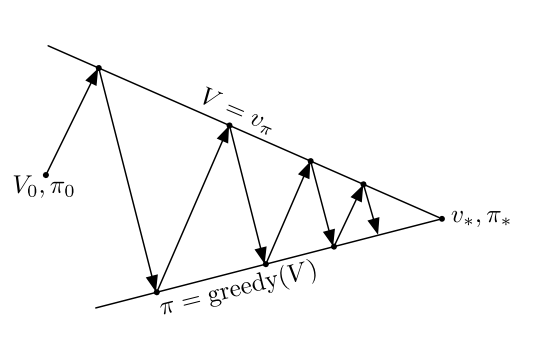

In [2]:
from IPython.display import Image 
Image(filename='D:\WeX\Code\QieLearning\Reinforcement Learning\Pics\Figure 4.6.png')

## 4.7 Efficiency of Dynamic Programming
page95